# Modelos de Machine Learning - Trabalho Humberto
César Macieira

## Instalando e Carregando Pacotes

In [1]:
import bz2
import time
import pickle
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import GradientBoostingRegressor

shatter_mod = shatter_mod.drop(columns=['Unnamed: 0'])
shatter_mod = shatter_mod.rename(columns={'Velocidade esteira (m/min)': 'Velocidade_esteira', '>6,30mm': 'maior6.30mm', 
                                          '% Umidade mistura 1': 'Umidade_mistura', '<0,106mm': 'menor0.106mm'})

## Construindo os modelos

In [2]:
from pycaret.regression import *

## QtdCID

In [3]:
%%time
treino_QtdCID = pd.read_excel('treino QtdCid.xlsx')
teste_QtdCID = pd.read_excel('teste QtdCid.xlsx')
dados_QtdCID = pd.concat([treino_QtdCID, teste_QtdCID], ignore_index = True)

CPU times: total: 1min 53s
Wall time: 2min 15s


In [4]:
x_treino_QtdCID = treino_QtdCID[['Idade1','EstadoCivil_1','EstadoCivil_2','EstadoCivil_3','EstadoCivil_4','EstadoCivil_5','EstadoCivil_6','Sexo_F',
            'Num_Membros_Familia1','Energia_Eletrica1','Situacao_Moradia_ALUGADO','Situacao_Moradia_ARRENDADO','Situacao_Moradia_CEDIDO',
            'Situacao_Moradia_FINANCIADO','Situacao_Moradia_OCUPACAO','Situacao_Moradia_OUTRA','Situacao_Moradia_PROPRIO',
            'Situacao_Moradia_SITUACAO_DE_RUA','Abastecimento_Agua_CISTERNA','Abastecimento_Agua_OUTRO','Consumo_Agua_CLORADA',
            'Consumo_Agua_FERVIDA','Consumo_Agua_FILTRADA','Consumo_Agua_SEM_TRATAMENTO','Destino_Lixo_CEU_ABERTO',
            'Destino_Lixo_COLETADO','Destino_Lixo_OUTRO','Destino_Lixo_QUEIMADO_ENTERRADO','Numero_Comodos1',
            'QtdAtendimentosMedicos','Regional_Atendimento_BARREIRO','Regional_Atendimento_CENTRO_SUL','Regional_Atendimento_LESTE',
            'Regional_Atendimento_NORDESTE','Regional_Atendimento_NOROESTE','Regional_Atendimento_NORTE','Regional_Atendimento_OESTE',
            'Regional_Atendimento_PAMPULHA','Regional_Atendimento_VENDA_NOVA']]
x_teste_QtdCID = teste_QtdCID[['Idade1','EstadoCivil_1','EstadoCivil_2','EstadoCivil_3','EstadoCivil_4','EstadoCivil_5','EstadoCivil_6','Sexo_F',
            'Num_Membros_Familia1','Energia_Eletrica1','Situacao_Moradia_ALUGADO','Situacao_Moradia_ARRENDADO','Situacao_Moradia_CEDIDO',
            'Situacao_Moradia_FINANCIADO','Situacao_Moradia_OCUPACAO','Situacao_Moradia_OUTRA','Situacao_Moradia_PROPRIO',
            'Situacao_Moradia_SITUACAO_DE_RUA','Abastecimento_Agua_CISTERNA','Abastecimento_Agua_OUTRO','Consumo_Agua_CLORADA',
            'Consumo_Agua_FERVIDA','Consumo_Agua_FILTRADA','Consumo_Agua_SEM_TRATAMENTO','Destino_Lixo_CEU_ABERTO',
            'Destino_Lixo_COLETADO','Destino_Lixo_OUTRO','Destino_Lixo_QUEIMADO_ENTERRADO','Numero_Comodos1',
            'QtdAtendimentosMedicos','Regional_Atendimento_BARREIRO','Regional_Atendimento_CENTRO_SUL','Regional_Atendimento_LESTE',
            'Regional_Atendimento_NORDESTE','Regional_Atendimento_NOROESTE','Regional_Atendimento_NORTE','Regional_Atendimento_OESTE',
            'Regional_Atendimento_PAMPULHA','Regional_Atendimento_VENDA_NOVA']]
y_treino_QtdCID = treino_QtdCID[['QtdCID']]
y_teste_QtdCID = teste_QtdCID[['QtdCID']]

In [5]:
%%time
modelos_pycaret_QtdCid = setup(data = dados_QtdCID, target='QtdCID', normalize = False, train_size = 0.75, fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'lightgbm', 'br', 'gbr', 'xgboost'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,QtdCID
2,Target type,Regression
3,Original data shape,"(169203, 40)"
4,Transformed data shape,"(169203, 40)"
5,Transformed train set shape,"(126902, 40)"
6,Transformed test set shape,"(42301, 40)"
7,Numeric features,39
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.3044,3.6842,1.9193,0.6179,0.3222,0.3823,13.1180
lightgbm,Light Gradient Boosting Machine,1.3043,3.7055,1.9249,0.6157,0.3222,0.3811,1.3140
xgboost,Extreme Gradient Boosting,1.3116,3.7701,1.9416,0.6090,0.3237,0.3822,1.7490
br,Bayesian Ridge,1.4053,3.9435,1.9857,0.5909,0.3444,0.4617,0.4180
rf,Random Forest Regressor,1.3985,4.1548,2.0383,0.5690,0.3433,0.4111,47.9320


CPU times: total: 31.9 s
Wall time: 11min 28s


GradientBoostingRegressor(random_state=13)

In [6]:
%%time
param_space_QtdCID = {'n_estimators': (10, 50), 'learning_rate': (0.01, 0.3, 'log-uniform'), 'max_depth': (1, 10)}
modelo_GBR = GradientBoostingRegressor(random_state = 13)
bayes_search_QtdCID = BayesSearchCV(modelo_GBR, param_space_QtdCID, scoring='neg_mean_squared_error', 
                                    n_iter=1, cv=10, random_state=13).fit(x_treino_QtdCID, y_treino_QtdCID)

CPU times: total: 3min 34s
Wall time: 3min 55s


In [8]:
modelo_QtdCID = GradientBoostingRegressor(**bayes_search_QtdCID.best_params_, random_state = 13).fit(x_treino_QtdCID, y_treino_QtdCID)

print('MAE:',mean_absolute_error(y_teste_QtdCID, modelo_QtdCID.predict(x_teste_QtdCID)).round(4))
print('MSE:',mean_squared_error(y_teste_QtdCID, modelo_QtdCID.predict(x_teste_QtdCID)).round(4))
print('RMSE:',np.sqrt(mean_squared_error(y_teste_QtdCID, modelo_QtdCID.predict(x_teste_QtdCID))).round(4))
print('RMSLE:',np.sqrt(mean_squared_log_error(y_teste_QtdCID, modelo_QtdCID.predict(x_teste_QtdCID))).round(4))
print(f'MAPE: {(mean_absolute_percentage_error(y_teste_QtdCID, modelo_QtdCID.predict(x_teste_QtdCID)) * 100).round(4)}%')
print(f'R² Score: {(r2_score(y_teste_QtdCID, modelo_QtdCID.predict(x_teste_QtdCID)) * 100).round(4)}')

MAE: 1.6876
MSE: 5.2021
RMSE: 2.2808
RMSLE: 0.4193
MAPE: 4244314304185191.0%
R² Score: 46.5036


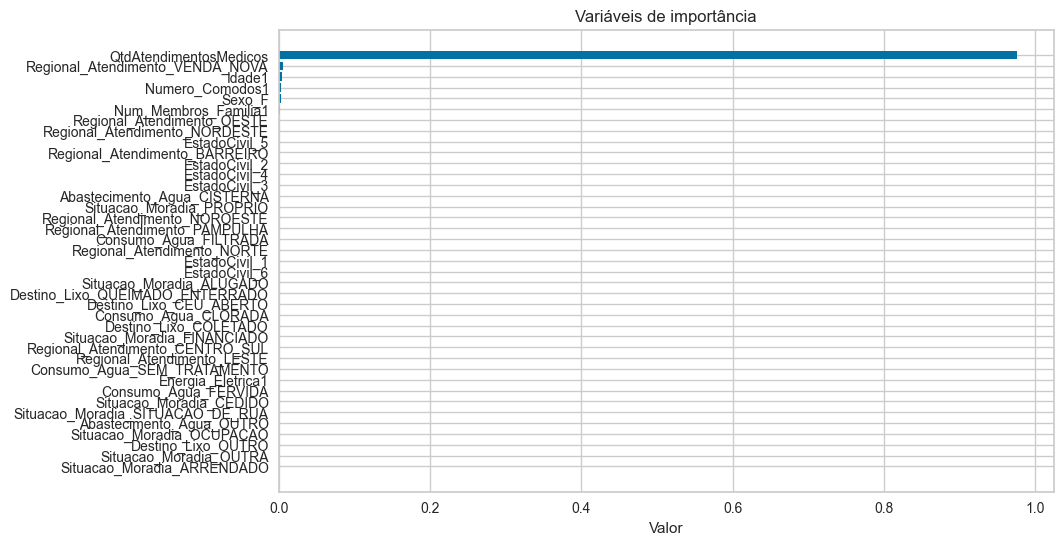

In [9]:
importance_features = modelo_QtdCID.feature_importances_
nomes_features = x_treino_QtdCID.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

### Sem atendimentos

In [10]:
x_treino_QtdCID2 = treino_QtdCID[['Idade1','EstadoCivil_1','EstadoCivil_2','EstadoCivil_3','EstadoCivil_4','EstadoCivil_5','EstadoCivil_6','Sexo_F',
            'Num_Membros_Familia1','Energia_Eletrica1','Situacao_Moradia_ALUGADO','Situacao_Moradia_ARRENDADO','Situacao_Moradia_CEDIDO',
            'Situacao_Moradia_FINANCIADO','Situacao_Moradia_OCUPACAO','Situacao_Moradia_OUTRA','Situacao_Moradia_PROPRIO',
            'Situacao_Moradia_SITUACAO_DE_RUA','Abastecimento_Agua_CISTERNA','Abastecimento_Agua_OUTRO','Consumo_Agua_CLORADA',
            'Consumo_Agua_FERVIDA','Consumo_Agua_FILTRADA','Consumo_Agua_SEM_TRATAMENTO','Destino_Lixo_CEU_ABERTO',
            'Destino_Lixo_COLETADO','Destino_Lixo_OUTRO','Destino_Lixo_QUEIMADO_ENTERRADO','Numero_Comodos1',
            #'QtdAtendimentosMedicos',
            'Regional_Atendimento_BARREIRO','Regional_Atendimento_CENTRO_SUL','Regional_Atendimento_LESTE',
            'Regional_Atendimento_NORDESTE','Regional_Atendimento_NOROESTE','Regional_Atendimento_NORTE','Regional_Atendimento_OESTE',
            'Regional_Atendimento_PAMPULHA','Regional_Atendimento_VENDA_NOVA']]
x_teste_QtdCID2 = teste_QtdCID[['Idade1','EstadoCivil_1','EstadoCivil_2','EstadoCivil_3','EstadoCivil_4','EstadoCivil_5','EstadoCivil_6','Sexo_F',
            'Num_Membros_Familia1','Energia_Eletrica1','Situacao_Moradia_ALUGADO','Situacao_Moradia_ARRENDADO','Situacao_Moradia_CEDIDO',
            'Situacao_Moradia_FINANCIADO','Situacao_Moradia_OCUPACAO','Situacao_Moradia_OUTRA','Situacao_Moradia_PROPRIO',
            'Situacao_Moradia_SITUACAO_DE_RUA','Abastecimento_Agua_CISTERNA','Abastecimento_Agua_OUTRO','Consumo_Agua_CLORADA',
            'Consumo_Agua_FERVIDA','Consumo_Agua_FILTRADA','Consumo_Agua_SEM_TRATAMENTO','Destino_Lixo_CEU_ABERTO',
            'Destino_Lixo_COLETADO','Destino_Lixo_OUTRO','Destino_Lixo_QUEIMADO_ENTERRADO','Numero_Comodos1',
            #'QtdAtendimentosMedicos',
            'Regional_Atendimento_BARREIRO','Regional_Atendimento_CENTRO_SUL','Regional_Atendimento_LESTE',
            'Regional_Atendimento_NORDESTE','Regional_Atendimento_NOROESTE','Regional_Atendimento_NORTE','Regional_Atendimento_OESTE',
            'Regional_Atendimento_PAMPULHA','Regional_Atendimento_VENDA_NOVA']]

In [11]:
%%time
modelos_pycaret_QtdCid2 = setup(data = dados_QtdCID.drop(['QtdAtendimentosMedicos'],axis = 1), target='QtdCID', 
                                normalize = False, train_size = 0.75, fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'lightgbm', 'br', 'gbr', 'xgboost'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,QtdCID
2,Target type,Regression
3,Original data shape,"(169203, 39)"
4,Transformed data shape,"(169203, 39)"
5,Transformed train set shape,"(126902, 39)"
6,Transformed test set shape,"(42301, 39)"
7,Numeric features,38
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.3186,9.3002,3.0495,0.0354,0.5695,0.9461,6.9440
lightgbm,Light Gradient Boosting Machine,2.3194,9.3110,3.0512,0.0343,0.5696,0.9452,0.5080
xgboost,Extreme Gradient Boosting,2.3302,9.4059,3.0667,0.0245,0.5722,0.9472,0.8880
br,Bayesian Ridge,2.3423,9.4335,3.0713,0.0216,0.5749,0.9615,0.2980
rf,Random Forest Regressor,2.5580,11.3896,3.3747,-0.1813,0.6219,1.0229,34.6420


CPU times: total: 19.4 s
Wall time: 7min 32s


GradientBoostingRegressor(random_state=13)

In [12]:
%%time
param_space_QtdCID = {'n_estimators': (10, 50), 'learning_rate': (0.01, 0.3, 'log-uniform'), 'max_depth': (1, 10)}
modelo_GBR = GradientBoostingRegressor(random_state = 13)
bayes_search_QtdCID2 = BayesSearchCV(modelo_GBR, param_space_QtdCID, scoring='neg_mean_squared_error', 
                                     n_iter=1, cv=10, random_state=13).fit(x_treino_QtdCID2, y_treino_QtdCID)

CPU times: total: 2min 6s
Wall time: 2min 7s


In [13]:
modelo_QtdCID2 = GradientBoostingRegressor(**bayes_search_QtdCID2.best_params_, random_state = 13).fit(x_treino_QtdCID2, y_treino_QtdCID)

print('MAE:',mean_absolute_error(y_teste_QtdCID, modelo_QtdCID2.predict(x_teste_QtdCID2)).round(4))
print('MSE:',mean_squared_error(y_teste_QtdCID, modelo_QtdCID2.predict(x_teste_QtdCID2)).round(4))
print('RMSE:',np.sqrt(mean_squared_error(y_teste_QtdCID, modelo_QtdCID2.predict(x_teste_QtdCID2))).round(4))
print('RMSLE:',np.sqrt(mean_squared_log_error(y_teste_QtdCID, modelo_QtdCID2.predict(x_teste_QtdCID2))).round(4))
print(f'MAPE: {(mean_absolute_percentage_error(y_teste_QtdCID, modelo_QtdCID2.predict(x_teste_QtdCID2)) * 100).round(4)}%')
print(f'R² Score: {(r2_score(y_teste_QtdCID, modelo_QtdCID2.predict(x_teste_QtdCID2)) * 100).round(4)}')

MAE: 2.3375
MSE: 9.4854
RMSE: 3.0798
RMSLE: 0.5742
MAPE: 6193885318417531.0%
R² Score: 2.4555


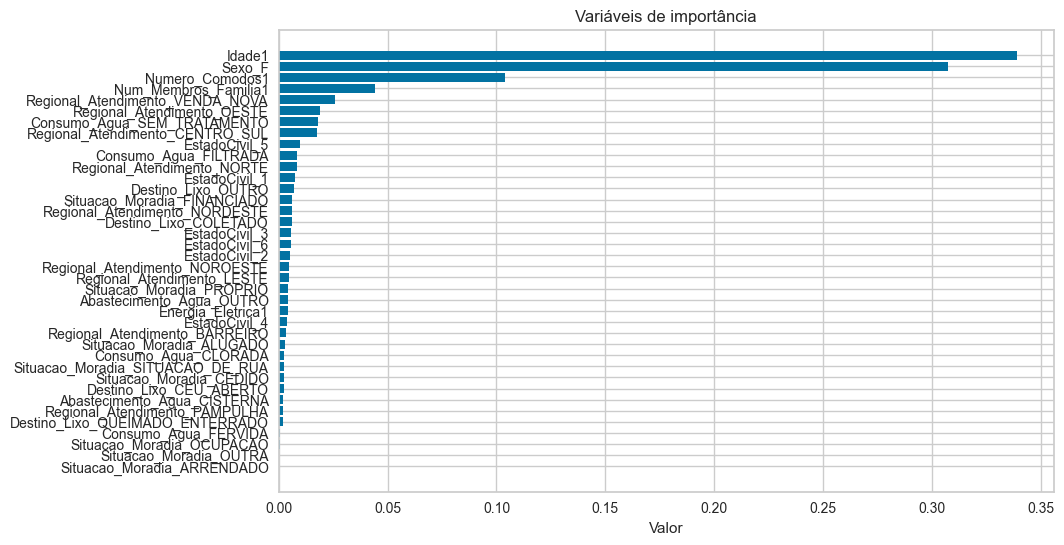

In [14]:
importance_features = modelo_QtdCID2.feature_importances_
nomes_features = x_treino_QtdCID2.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

## QtdMedicamentos

In [15]:
%%time
treino_QtdMedicamentos = pd.read_excel('treino QtdMedicamentos.xlsx')
teste_QtdMedicamentos = pd.read_excel('teste QtdMedicamentos.xlsx')
dados_QtdMedicamentos = pd.concat([treino_QtdMedicamentos, teste_QtdMedicamentos], ignore_index = True)

CPU times: total: 1min 12s
Wall time: 1min 13s


In [16]:
x_treino_QtdMedicamentos = treino_QtdMedicamentos[['Idade1','EstadoCivil_1','EstadoCivil_2','EstadoCivil_3','EstadoCivil_4','EstadoCivil_5',
            'EstadoCivil_6','Sexo_F','Num_Membros_Familia1','Energia_Eletrica1','Situacao_Moradia_ALUGADO','Situacao_Moradia_ARRENDADO',
            'Situacao_Moradia_CEDIDO','Situacao_Moradia_FINANCIADO','Situacao_Moradia_OCUPACAO','Situacao_Moradia_OUTRA','Situacao_Moradia_PROPRIO',
            'Situacao_Moradia_SITUACAO_DE_RUA','Abastecimento_Agua_CISTERNA','Abastecimento_Agua_OUTRO','Consumo_Agua_CLORADA',
            'Consumo_Agua_FERVIDA','Consumo_Agua_FILTRADA','Consumo_Agua_SEM_TRATAMENTO','Destino_Lixo_CEU_ABERTO',
            'Destino_Lixo_COLETADO','Destino_Lixo_OUTRO','Destino_Lixo_QUEIMADO_ENTERRADO','Numero_Comodos1',
            'QtdAtendimentosMedicos','Regional_Atendimento_BARREIRO','Regional_Atendimento_CENTRO_SUL','Regional_Atendimento_LESTE',
            'Regional_Atendimento_NORDESTE','Regional_Atendimento_NOROESTE','Regional_Atendimento_NORTE','Regional_Atendimento_OESTE',
            'Regional_Atendimento_PAMPULHA','Regional_Atendimento_VENDA_NOVA']]
x_teste_QtdMedicamentos = teste_QtdMedicamentos[['Idade1','EstadoCivil_1','EstadoCivil_2','EstadoCivil_3','EstadoCivil_4','EstadoCivil_5',
            'EstadoCivil_6','Sexo_F','Num_Membros_Familia1','Energia_Eletrica1','Situacao_Moradia_ALUGADO','Situacao_Moradia_ARRENDADO',
            'Situacao_Moradia_CEDIDO','Situacao_Moradia_FINANCIADO','Situacao_Moradia_OCUPACAO','Situacao_Moradia_OUTRA','Situacao_Moradia_PROPRIO',
            'Situacao_Moradia_SITUACAO_DE_RUA','Abastecimento_Agua_CISTERNA','Abastecimento_Agua_OUTRO','Consumo_Agua_CLORADA',
            'Consumo_Agua_FERVIDA','Consumo_Agua_FILTRADA','Consumo_Agua_SEM_TRATAMENTO','Destino_Lixo_CEU_ABERTO',
            'Destino_Lixo_COLETADO','Destino_Lixo_OUTRO','Destino_Lixo_QUEIMADO_ENTERRADO','Numero_Comodos1',
            'QtdAtendimentosMedicos','Regional_Atendimento_BARREIRO','Regional_Atendimento_CENTRO_SUL','Regional_Atendimento_LESTE',
            'Regional_Atendimento_NORDESTE','Regional_Atendimento_NOROESTE','Regional_Atendimento_NORTE','Regional_Atendimento_OESTE',
            'Regional_Atendimento_PAMPULHA','Regional_Atendimento_VENDA_NOVA']]
y_treino_QtdMedicamentos = treino_QtdMedicamentos[['QtdMedicamentos']]
y_teste_QtdMedicamentos = teste_QtdMedicamentos[['QtdMedicamentos']]

In [17]:
%%time
modelos_pycaret_QtdMedicamentos = setup(data = dados_QtdMedicamentos, target='QtdMedicamentos', normalize = False, train_size = 0.75, fold = 10, 
                                        session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'lightgbm', 'br', 'gbr', 'xgboost'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,QtdMedicamentos
2,Target type,Regression
3,Original data shape,"(169203, 40)"
4,Transformed data shape,"(169203, 40)"
5,Transformed train set shape,"(126902, 40)"
6,Transformed test set shape,"(42301, 40)"
7,Numeric features,39
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.9454,1.7286,1.3147,0.4025,0.5019,0.5205,9.1130
lightgbm,Light Gradient Boosting Machine,0.9454,1.7321,1.3160,0.4013,0.5016,0.5209,2.4860
xgboost,Extreme Gradient Boosting,0.9503,1.7619,1.3273,0.3910,0.5041,0.5258,0.9640
br,Bayesian Ridge,0.9858,1.8238,1.3504,0.3696,0.5139,0.4883,0.3250
rf,Random Forest Regressor,1.0029,1.9624,1.4008,0.3217,0.5352,0.5737,31.8490


CPU times: total: 22.7 s
Wall time: 7min 49s


GradientBoostingRegressor(random_state=13)

In [18]:
%%time
param_space_QtdMedicamentos = {'n_estimators': (10, 50), 'learning_rate': (0.01, 0.3, 'log-uniform'), 'max_depth': (1, 10)}
modelo_GBR = GradientBoostingRegressor(random_state = 13)
bayes_search_QtdMedicamentos = BayesSearchCV(modelo_GBR, param_space_QtdMedicamentos, scoring='neg_mean_squared_error', 
                                    n_iter=1, cv=10, random_state=13).fit(x_treino_QtdMedicamentos, y_treino_QtdMedicamentos)

CPU times: total: 3min 31s
Wall time: 3min 32s


In [19]:
modelo_QtdMedicamentos = GradientBoostingRegressor(**bayes_search_QtdMedicamentos.best_params_, 
                                                   random_state = 13).fit(x_treino_QtdMedicamentos, y_treino_QtdMedicamentos)

print('MAE:',mean_absolute_error(y_teste_QtdMedicamentos, modelo_QtdMedicamentos.predict(x_teste_QtdMedicamentos)).round(4))
print('MSE:',mean_squared_error(y_teste_QtdMedicamentos, modelo_QtdMedicamentos.predict(x_teste_QtdMedicamentos)).round(4))
print('RMSE:',np.sqrt(mean_squared_error(y_teste_QtdMedicamentos, modelo_QtdMedicamentos.predict(x_teste_QtdMedicamentos))).round(4))
print('RMSLE:',np.sqrt(mean_squared_log_error(y_teste_QtdMedicamentos, modelo_QtdMedicamentos.predict(x_teste_QtdMedicamentos))).round(4))
print(f'MAPE: {(mean_absolute_percentage_error(y_teste_QtdMedicamentos, modelo_QtdMedicamentos.predict(x_teste_QtdMedicamentos)) * 100).round(4)}%')
print(f'R² Score: {(r2_score(y_teste_QtdMedicamentos, modelo_QtdMedicamentos.predict(x_teste_QtdMedicamentos)) * 100).round(4)}')

MAE: 1.0794
MSE: 2.0104
RMSE: 1.4179
RMSLE: 0.5593
MAPE: 1.9785221755922595e+17%
R² Score: 30.5219


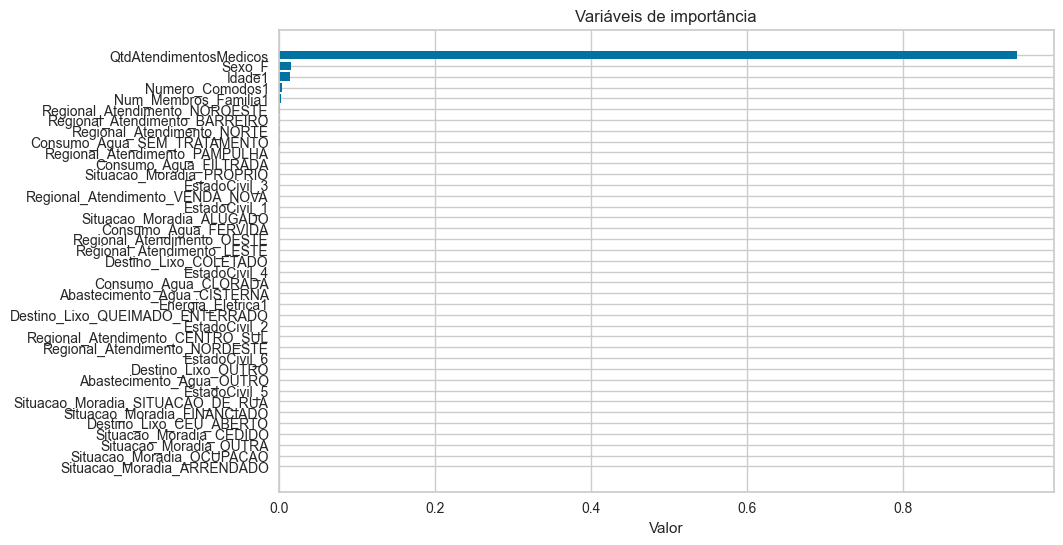

In [20]:
importance_features = modelo_QtdMedicamentos.feature_importances_
nomes_features = x_treino_QtdMedicamentos.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

### Sem atendimentos

In [21]:
x_treino_QtdMedicamentos2 = treino_QtdMedicamentos[['Idade1','EstadoCivil_1','EstadoCivil_2','EstadoCivil_3','EstadoCivil_4','EstadoCivil_5','EstadoCivil_6','Sexo_F',
            'Num_Membros_Familia1','Energia_Eletrica1','Situacao_Moradia_ALUGADO','Situacao_Moradia_ARRENDADO','Situacao_Moradia_CEDIDO',
            'Situacao_Moradia_FINANCIADO','Situacao_Moradia_OCUPACAO','Situacao_Moradia_OUTRA','Situacao_Moradia_PROPRIO',
            'Situacao_Moradia_SITUACAO_DE_RUA','Abastecimento_Agua_CISTERNA','Abastecimento_Agua_OUTRO','Consumo_Agua_CLORADA',
            'Consumo_Agua_FERVIDA','Consumo_Agua_FILTRADA','Consumo_Agua_SEM_TRATAMENTO','Destino_Lixo_CEU_ABERTO',
            'Destino_Lixo_COLETADO','Destino_Lixo_OUTRO','Destino_Lixo_QUEIMADO_ENTERRADO','Numero_Comodos1',
            #'QtdAtendimentosMedicos',
            'Regional_Atendimento_BARREIRO','Regional_Atendimento_CENTRO_SUL','Regional_Atendimento_LESTE',
            'Regional_Atendimento_NORDESTE','Regional_Atendimento_NOROESTE','Regional_Atendimento_NORTE','Regional_Atendimento_OESTE',
            'Regional_Atendimento_PAMPULHA','Regional_Atendimento_VENDA_NOVA']]
x_teste_QtdMedicamentos2 = teste_QtdMedicamentos[['Idade1','EstadoCivil_1','EstadoCivil_2','EstadoCivil_3','EstadoCivil_4','EstadoCivil_5','EstadoCivil_6','Sexo_F',
            'Num_Membros_Familia1','Energia_Eletrica1','Situacao_Moradia_ALUGADO','Situacao_Moradia_ARRENDADO','Situacao_Moradia_CEDIDO',
            'Situacao_Moradia_FINANCIADO','Situacao_Moradia_OCUPACAO','Situacao_Moradia_OUTRA','Situacao_Moradia_PROPRIO',
            'Situacao_Moradia_SITUACAO_DE_RUA','Abastecimento_Agua_CISTERNA','Abastecimento_Agua_OUTRO','Consumo_Agua_CLORADA',
            'Consumo_Agua_FERVIDA','Consumo_Agua_FILTRADA','Consumo_Agua_SEM_TRATAMENTO','Destino_Lixo_CEU_ABERTO',
            'Destino_Lixo_COLETADO','Destino_Lixo_OUTRO','Destino_Lixo_QUEIMADO_ENTERRADO','Numero_Comodos1',
            #'QtdAtendimentosMedicos',
            'Regional_Atendimento_BARREIRO','Regional_Atendimento_CENTRO_SUL','Regional_Atendimento_LESTE',
            'Regional_Atendimento_NORDESTE','Regional_Atendimento_NOROESTE','Regional_Atendimento_NORTE','Regional_Atendimento_OESTE',
            'Regional_Atendimento_PAMPULHA','Regional_Atendimento_VENDA_NOVA']]


In [22]:
%%time
modelos_pycaret_QtdMedicamentos2 = setup(data = dados_QtdMedicamentos.drop(['QtdAtendimentosMedicos'],axis = 1), target='QtdMedicamentos', 
                                normalize = False, train_size = 0.75, fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'lightgbm', 'br', 'gbr', 'xgboost'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,QtdMedicamentos
2,Target type,Regression
3,Original data shape,"(169203, 39)"
4,Transformed data shape,"(169203, 39)"
5,Transformed train set shape,"(126902, 39)"
6,Transformed test set shape,"(42301, 39)"
7,Numeric features,38
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.2904,2.7693,1.6641,0.0428,0.6632,0.4507,7.2630
lightgbm,Light Gradient Boosting Machine,1.2880,2.7696,1.6642,0.0427,0.6628,0.4515,0.5650
xgboost,Extreme Gradient Boosting,1.2942,2.7998,1.6732,0.0323,0.6659,0.4631,0.9430
br,Bayesian Ridge,1.3047,2.8066,1.6753,0.0299,0.6682,0.4520,0.2980
rf,Random Forest Regressor,1.4109,3.3990,1.8436,-0.1749,0.7245,0.5945,32.0650


CPU times: total: 21.9 s
Wall time: 7min 12s


GradientBoostingRegressor(random_state=13)

In [23]:
%%time
param_space_QtdMedicamentos = {'n_estimators': (10, 50), 'learning_rate': (0.01, 0.3, 'log-uniform'), 'max_depth': (1, 10)}
modelo_GBR = GradientBoostingRegressor(random_state = 13)
bayes_search_QtdMedicamentos2 = BayesSearchCV(modelo_GBR, param_space_QtdMedicamentos, scoring='neg_mean_squared_error', 
                                    n_iter=1, cv=10, random_state=13).fit(x_treino_QtdMedicamentos2, y_treino_QtdMedicamentos)

CPU times: total: 2min 38s
Wall time: 2min 43s


In [24]:
modelo_QtdMedicamentos2 = GradientBoostingRegressor(**bayes_search_QtdMedicamentos2.best_params_, 
                                                    random_state = 13).fit(x_treino_QtdMedicamentos2, y_treino_QtdMedicamentos)

print('MAE:',mean_absolute_error(y_teste_QtdMedicamentos, modelo_QtdMedicamentos2.predict(x_teste_QtdMedicamentos2)).round(4))
print('MSE:',mean_squared_error(y_teste_QtdMedicamentos, modelo_QtdMedicamentos2.predict(x_teste_QtdMedicamentos2)).round(4))
print('RMSE:',np.sqrt(mean_squared_error(y_teste_QtdMedicamentos, modelo_QtdMedicamentos2.predict(x_teste_QtdMedicamentos2))).round(4))
print('RMSLE:',np.sqrt(mean_squared_log_error(y_teste_QtdMedicamentos, modelo_QtdMedicamentos2.predict(x_teste_QtdMedicamentos2))).round(4))
print(f'MAPE: {(mean_absolute_percentage_error(y_teste_QtdMedicamentos, modelo_QtdMedicamentos2.predict(x_teste_QtdMedicamentos2)) * 100).round(4)}%')
print(f'R² Score: {(r2_score(y_teste_QtdMedicamentos, modelo_QtdMedicamentos2.predict(x_teste_QtdMedicamentos2)) * 100).round(4)}')

MAE: 1.3124
MSE: 2.8041
RMSE: 1.6745
RMSLE: 0.6676
MAPE: 2.5750998410019898e+17%
R² Score: 3.0939


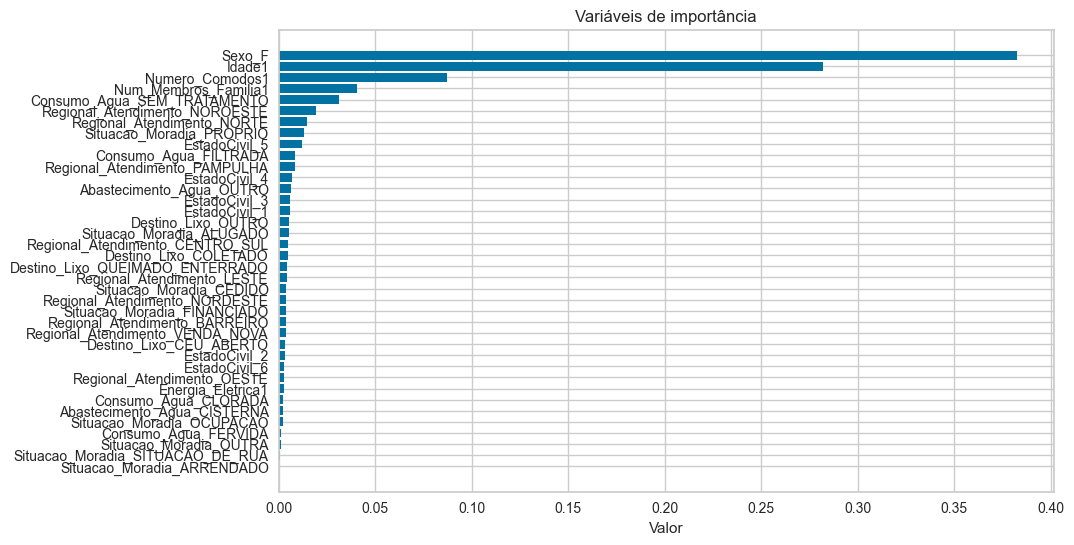

In [25]:
importance_features = modelo_QtdMedicamentos2.feature_importances_
nomes_features = x_treino_QtdMedicamentos2.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

# Grid de parâmetros

In [ ]:
RF_mod = RandomForestRegressor(random_state = 13)
parametros_RF = {
    "n_estimators": (1, 200),  # Número de árvores na floresta
    "max_depth": (1, 10),  # Profundidade máxima de cada árvore
    #"min_samples_split": (2, 50),  # Número mínimo de amostras necessárias para dividir um nó interno
    "min_samples_leaf": (1, 50),  # Número mínimo de amostras necessárias para estar em um nó folha
    "max_leaf_nodes": (2, 100),  # Número máximo de folhas nas árvores
    "max_samples": (0.1, 1.0),  # Número máximo de amostras a serem usadas para ajustar cada árvore
}

def RunSKOpt(parametros_RF, cv_mod, n_iter):  
    search = BayesSearchCV(RF_mod, parametros_RF, n_iter = n_iter, n_jobs = 4, cv = cv_mod, verbose = -1, return_train_score = True, random_state=13)
    return search
search_LE = RunSKOpt(parametros_RF = parametros_RF, n_iter = 25, cv_mod = 10).fit(x_train, y_train)

# Random Forest

In [ ]:
modelo_RF = RandomForestRegressor(**search_LE.best_params_, random_state = 13).fit(x_train, y_train)

# Métricas de desempenho

In [ ]:
erro_mae = mean_absolute_error(y_test, modelo_RF.predict(x_test))
erro_mse = mean_squared_error(y_test, modelo_RF.predict(x_test))
erro_rmse = np.sqrt(mean_squared_error(y_test, modelo_RF.predict(x_test)))
erro_rmsle = np.sqrt(mean_squared_log_error(y_test, modelo_RF.predict(x_test)))
erro_mape = mean_absolute_percentage_error(y_test, modelo_RF.predict(x_test))
r2 = r2_score(y_test, modelo_RF.predict(x_test))

print('MAE:',erro_mae.round(4))
print('MSE:',erro_mse.round(4))
print('RMSE:',erro_rmse.round(4))
print('RMSLE:',erro_rmsle.round(4))
print(f'MAPE: {(erro_mape * 100).round(4)}%')
print(f'R² Score: {(r2 * 100).round(4)}')

In [ ]:
importance_features = modelo_RF.feature_importances_
nomes_features = x_train.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
#plt.ylabel('Variáveis')
plt.title('Variáveis de importância')
plt.show()